In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
import warnings
from pyramid.arima import auto_arima

warnings.filterwarnings('ignore')
plt.style.use('bmh')
%matplotlib inline

In [2]:
data = pd.read_csv('../raw data/ETH-USD_hourly.csv')

In [3]:
# data.head()

In [4]:
# data.tail()

In [5]:
data = data[['time_period_start', 'price_close']]

In [6]:
# data

In [7]:
data['time_period_start'] = pd.to_datetime(data['time_period_start'])

In [8]:
data = data.set_index('time_period_start')

In [9]:
data = data.resample('H').mean()

In [10]:
np.where(np.isnan(data))

(array([], dtype=int64), array([], dtype=int64))

In [11]:
data.index

DatetimeIndex(['2019-04-01 00:00:00', '2019-04-01 01:00:00',
               '2019-04-01 02:00:00', '2019-04-01 03:00:00',
               '2019-04-01 04:00:00', '2019-04-01 05:00:00',
               '2019-04-01 06:00:00', '2019-04-01 07:00:00',
               '2019-04-01 08:00:00', '2019-04-01 09:00:00',
               ...
               '2019-04-30 14:00:00', '2019-04-30 15:00:00',
               '2019-04-30 16:00:00', '2019-04-30 17:00:00',
               '2019-04-30 18:00:00', '2019-04-30 19:00:00',
               '2019-04-30 20:00:00', '2019-04-30 21:00:00',
               '2019-04-30 22:00:00', '2019-04-30 23:00:00'],
              dtype='datetime64[ns]', name='time_period_start', length=720, freq='H')

In [12]:
y = data['price_close']

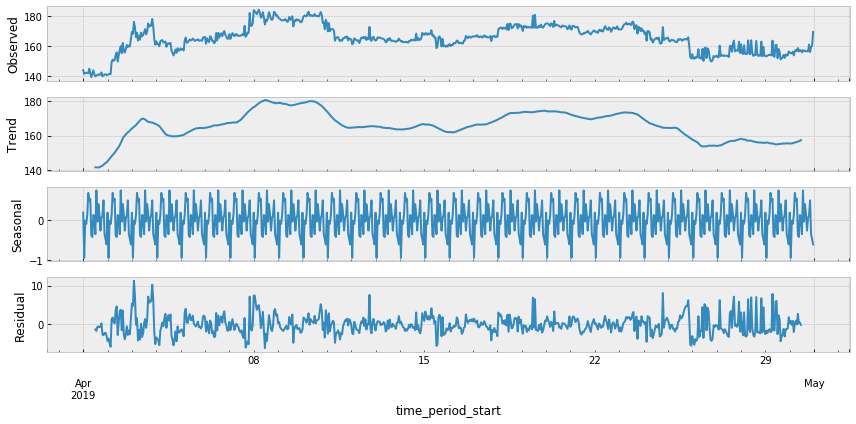

In [13]:
rcParams['figure.figsize'] = 12, 6

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.resample('D').mean()
    rolstd = timeseries.resample('D').std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    
    print()
    #Perform Ljung-Box test:
    print('Results of Ljung-Box Test:')
    lbtest = acorr_ljungbox(timeseries, lags=5)
    for i in range(5):
        print('Largest Lag Included:{} Test Statistic={}  p-value={}'.format(i, lbtest[0][i], lbtest[1][i]))

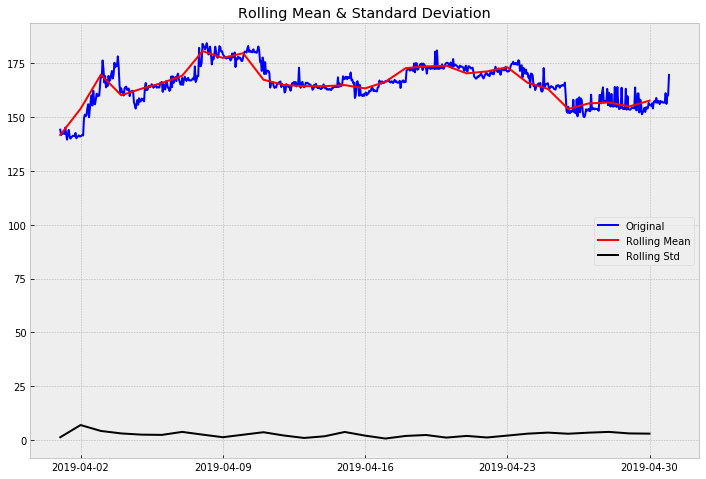

Results of Dickey-Fuller Test:
Test Statistic                  -2.947571
p-value                          0.040089
#Lags Used                       3.000000
Number of Observations Used    716.000000
Critical Value (1%)             -3.439516
Critical Value (5%)             -2.865585
Critical Value (10%)            -2.568924
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=645.0642879422236  p-value=2.645681318292788e-142
Largest Lag Included:1 Test Statistic=1270.1611173103176  p-value=1.5417636851090904e-276
Largest Lag Included:2 Test Statistic=1879.952974653139  p-value=0.0
Largest Lag Included:3 Test Statistic=2470.9156430455355  p-value=0.0
Largest Lag Included:4 Test Statistic=3041.1321387515086  p-value=0.0


In [15]:
test_stationarity(y)

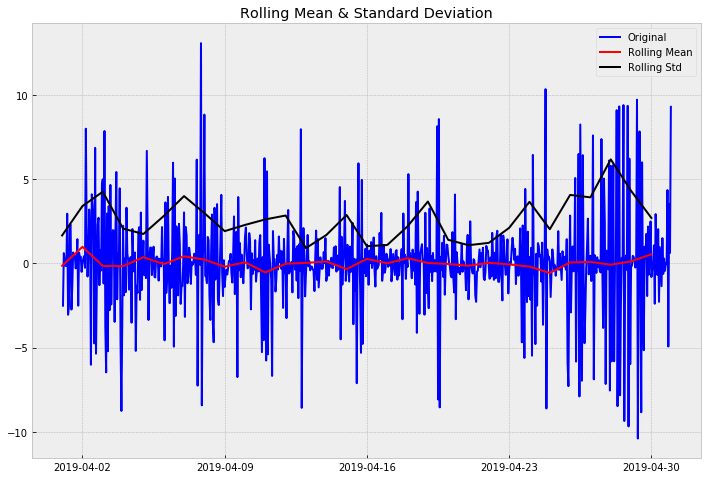

Results of Dickey-Fuller Test:
Test Statistic                 -20.991817
p-value                          0.000000
#Lags Used                       2.000000
Number of Observations Used    716.000000
Critical Value (1%)             -3.439516
Critical Value (5%)             -2.865585
Critical Value (10%)            -2.568924
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=111.2908490063124  p-value=5.109650518388699e-26
Largest Lag Included:1 Test Statistic=111.9220676004274  p-value=4.9708632870763135e-25
Largest Lag Included:2 Test Statistic=112.603366078339  p-value=3.020036724386374e-24
Largest Lag Included:3 Test Statistic=112.71258339266872  p-value=1.920235792483865e-23
Largest Lag Included:4 Test Statistic=113.49430359488858  p-value=7.477102342373376e-23


In [16]:
test_stationarity(y.diff(1).dropna())

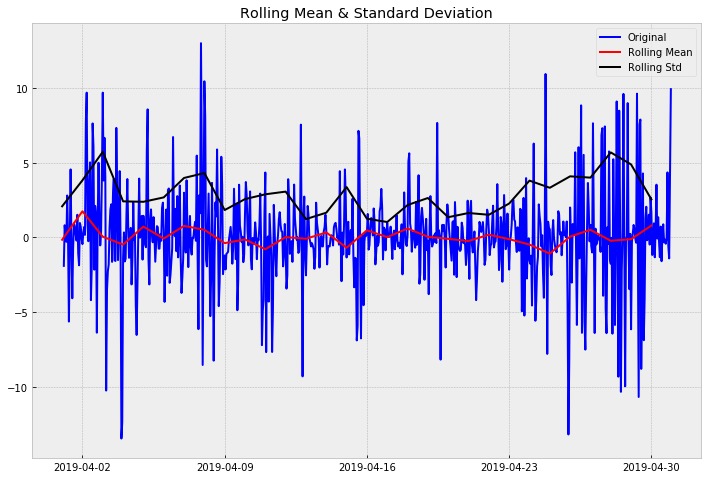

Results of Dickey-Fuller Test:
Test Statistic                  -4.297962
p-value                          0.000448
#Lags Used                      20.000000
Number of Observations Used    697.000000
Critical Value (1%)             -3.439767
Critical Value (5%)             -2.865696
Critical Value (10%)            -2.568983
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=14.281785946197289  p-value=0.00015738039547377424
Largest Lag Included:1 Test Statistic=105.94532979961215  p-value=9.86879078791624e-24
Largest Lag Included:2 Test Statistic=107.02682905263036  p-value=4.787493155729782e-23
Largest Lag Included:3 Test Statistic=111.00566032336205  p-value=4.44116933468177e-23
Largest Lag Included:4 Test Statistic=111.01119836407089  p-value=2.5048187158183874e-22


In [17]:
test_stationarity(y.diff(2).dropna())

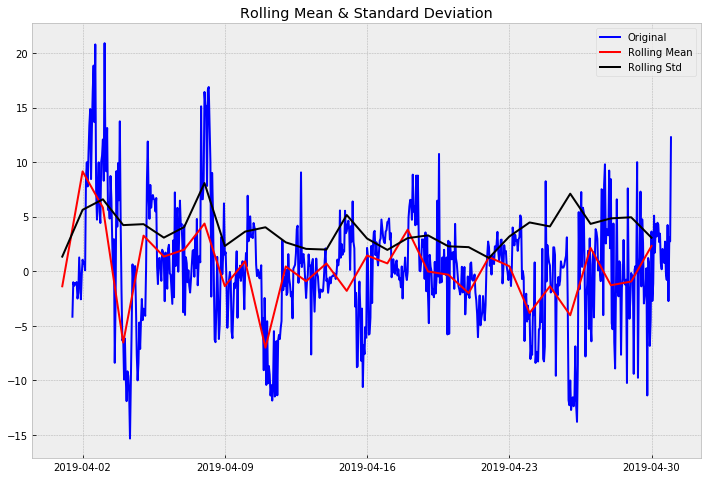

Results of Dickey-Fuller Test:
Test Statistic                -5.749499e+00
p-value                        6.012355e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.870000e+02
Critical Value (1%)           -3.439904e+00
Critical Value (5%)           -2.865756e+00
Critical Value (10%)          -2.569015e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=329.00616961149893  p-value=1.582143666832917e-73
Largest Lag Included:1 Test Statistic=608.5047194056992  p-value=7.326205138211279e-133
Largest Lag Included:2 Test Statistic=845.8578992554361  p-value=4.902213651400378e-183
Largest Lag Included:3 Test Statistic=1049.449734409377  p-value=6.84926824969542e-226
Largest Lag Included:4 Test Statistic=1194.9749792419036  p-value=3.601033163837537e-256


In [18]:
test_stationarity(y.diff(12).dropna())

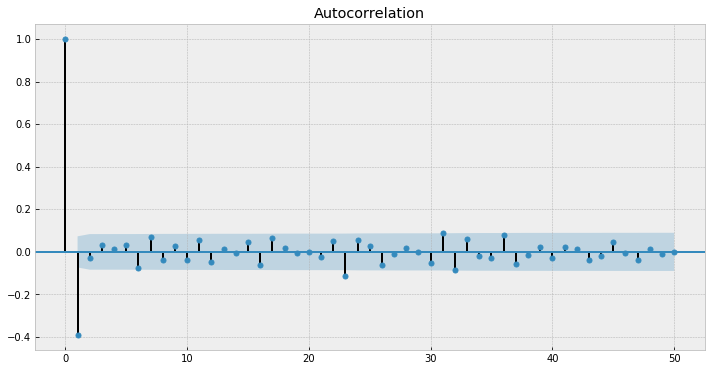

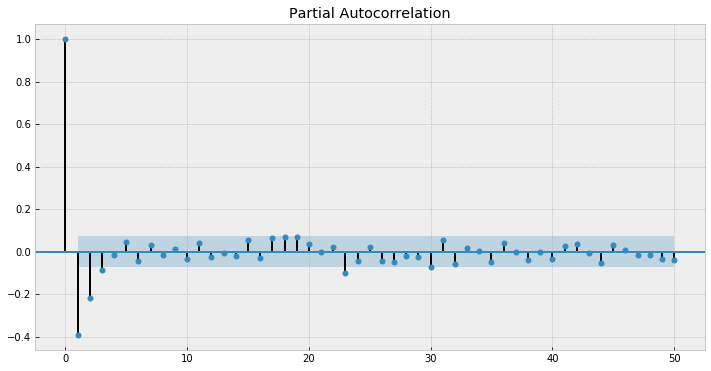

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
 
acf = plot_acf(y.diff(1).dropna(), lags=50)
pacf = plot_pacf(y.diff(1).dropna(), lags=50)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5025      0.024    -20.598      0.000      -0.550      -0.455
sigma2         6.4982      0.201     32.292      0.000       6.104       6.893
3380.706105977676


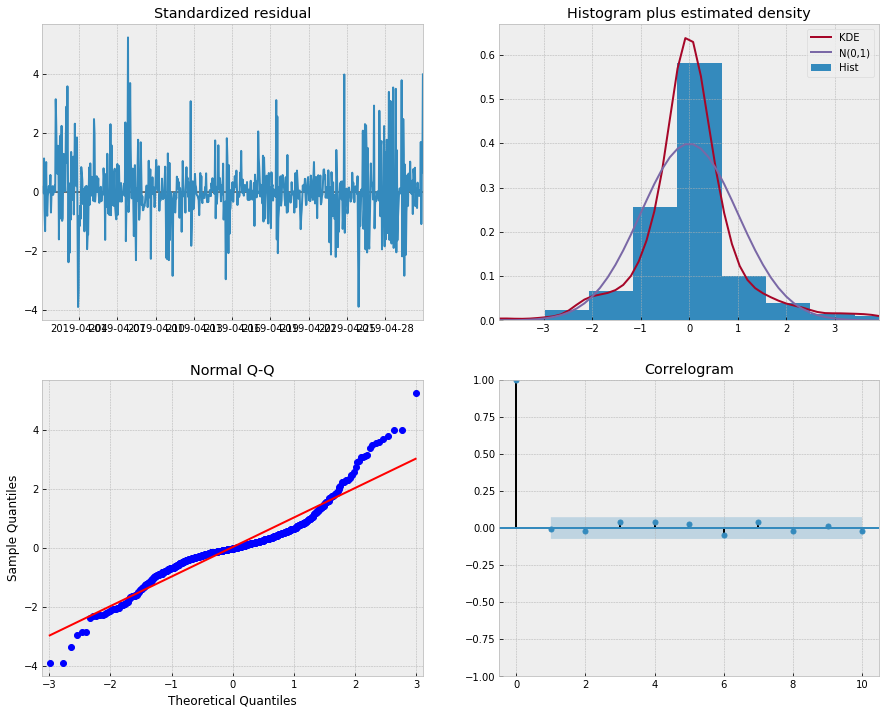

In [20]:
mod_baseline = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order = (0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_baseline = mod_baseline.fit()

print(results_baseline.summary().tables[1])
print(results_baseline.aic)
b = results_baseline.plot_diagnostics(figsize=(15, 12))

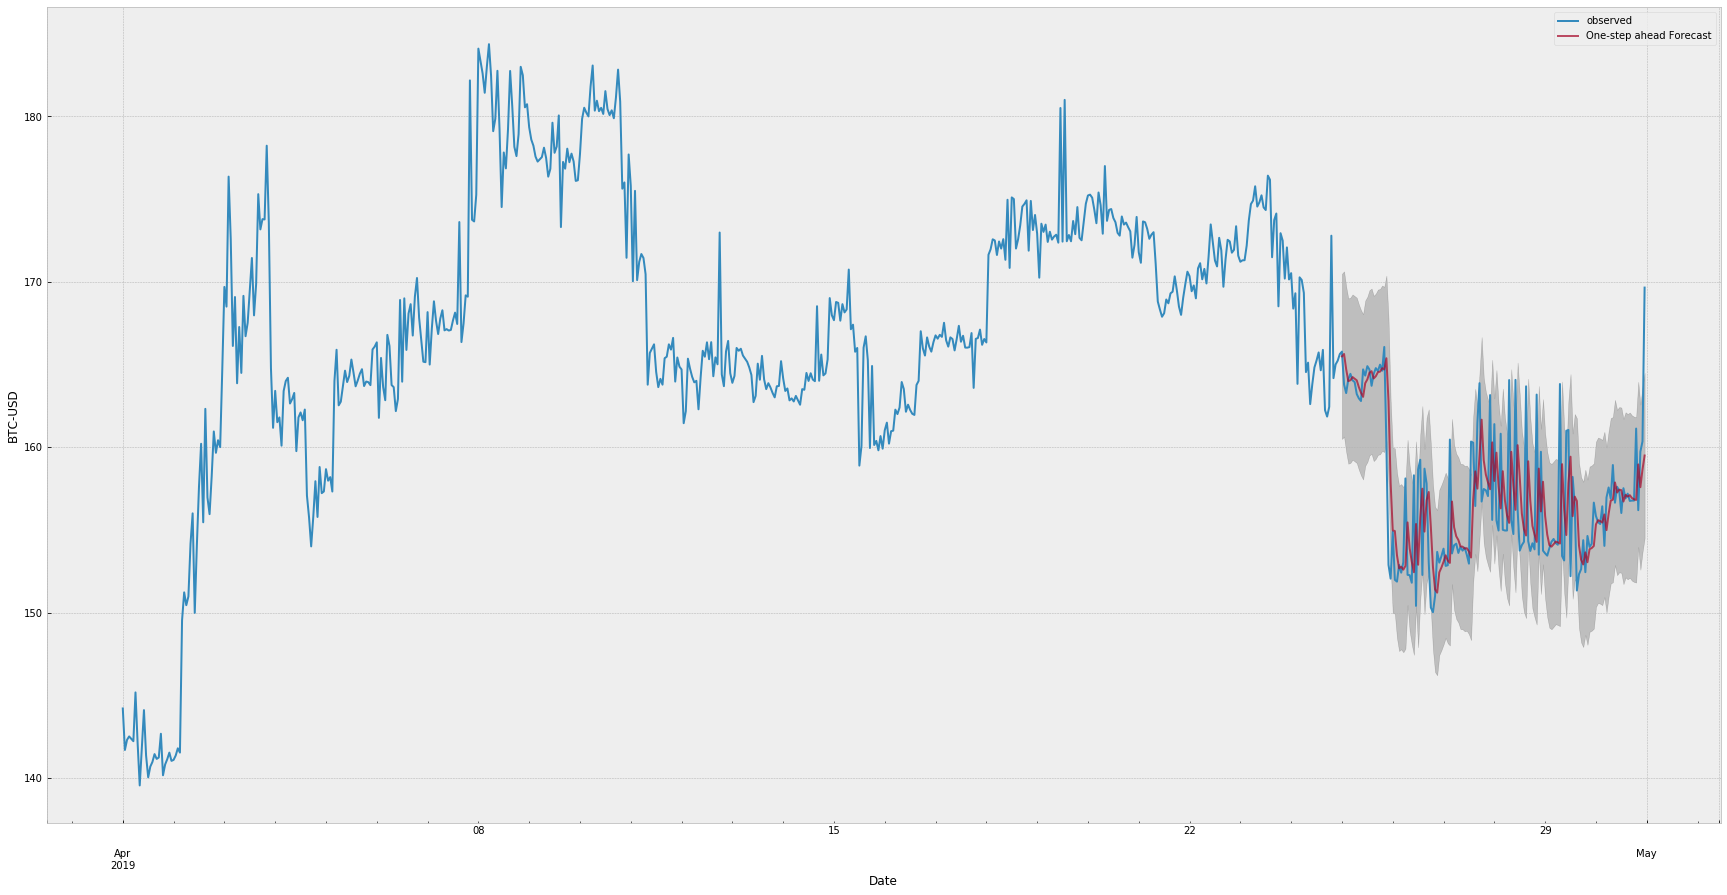

In [21]:
pred = results_baseline.get_prediction(start=y.index[int(len(y)*0.8)], end=y.index[-1], dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed', figsize=(30, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('BTC-USD')
plt.legend()

In [22]:
y_forecasted = pred.predicted_mean
y_truth = y[int(len(y)*0.8):]
y_train = y[:int(len(y)*0.8)]

# MSE
mse = ((y_truth - y_forecasted) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# OSR2
OSR2 = 1 - np.sum((y_truth - y_forecasted) ** 2)/np.sum((y_truth - np.average(y_train)) ** 2)
print('The out-of-sample R2 of our model is {}'.format(round(OSR2, 4)))

The Mean Squared Error of our forecasts is 11.5366
The out-of-sample R2 of our model is 0.9082


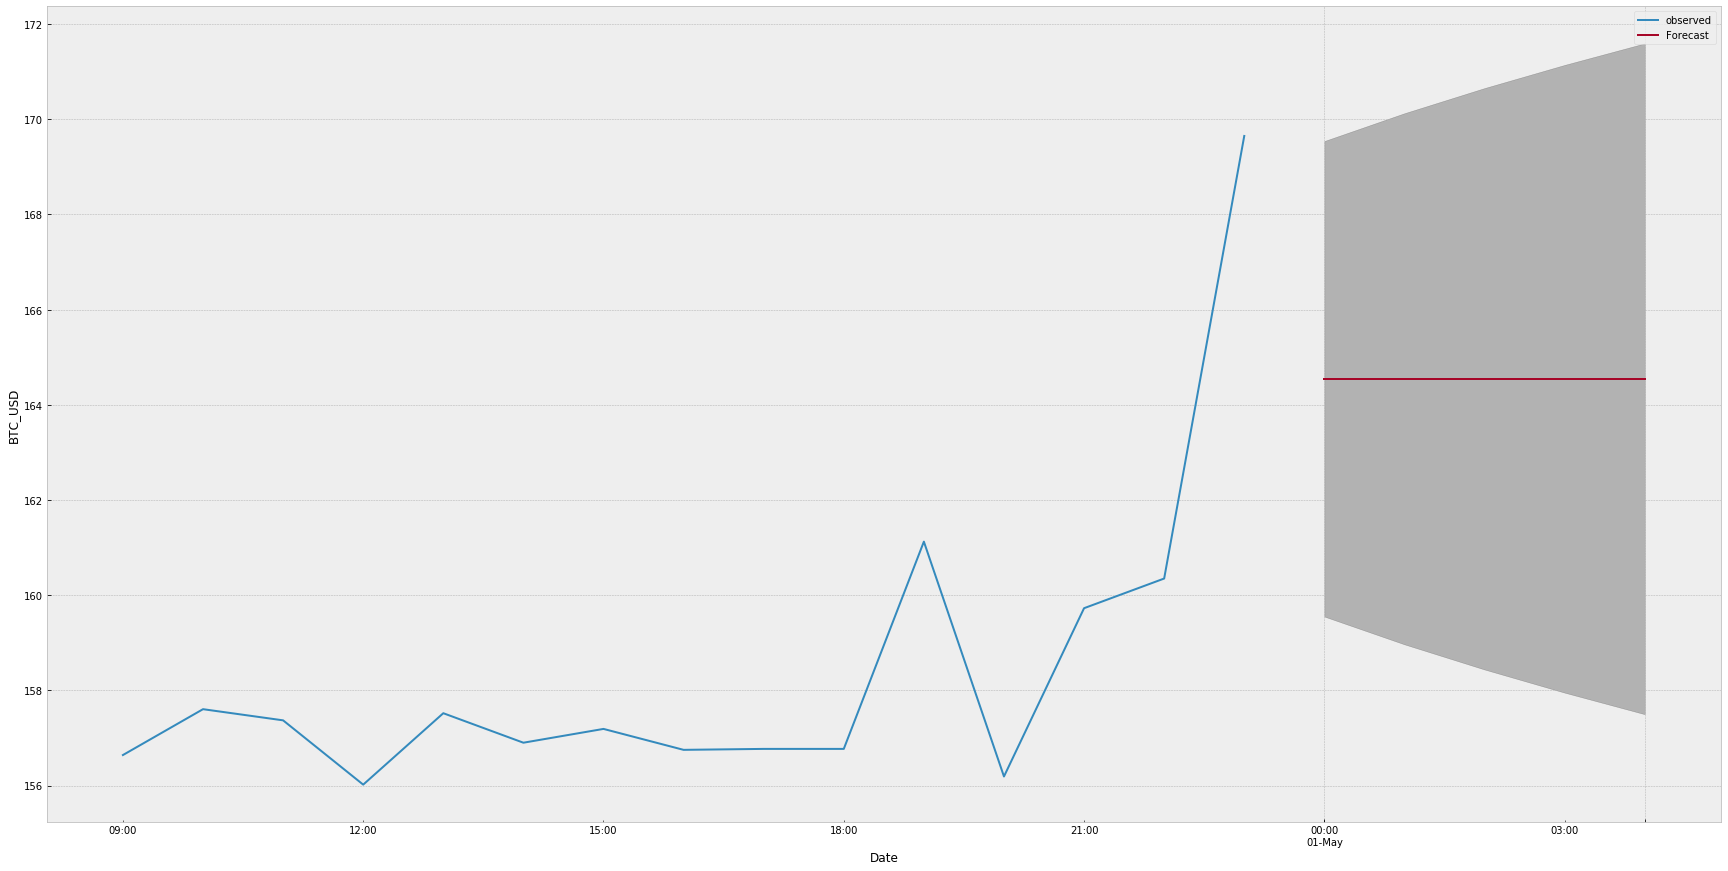

In [23]:
# Forcast the future
pred_uc = results_baseline.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()

ax = y[-15:].plot(label='observed', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('BTC_USD')

plt.legend()

### Build an Advanced Model by Grid Search

In [24]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [25]:
AIC_list = pd.DataFrame({}, columns=['param','param_seasonal','AIC'])

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                           order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            
            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            temp = pd.DataFrame([[ param ,  param_seasonal , results.aic ]], columns=['param','param_seasonal','AIC'])
            AIC_list = AIC_list.append( temp, ignore_index=True)

        except:
            continue

print('Finished...')

AIC_list = AIC_list.dropna()
m = np.amin(AIC_list['AIC'].values) # Find the minimum value in AIC
l = AIC_list['AIC'].tolist().index(m) # Find the index number of the lowest AIC
Min_AIC_list = AIC_list.iloc[l,:]

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:9390.472123208105
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:8322.268279941036
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:7404.349672784392
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4341.889099234676
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4280.962826675106
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:4167.892582653141
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:4768.30816492224
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:4228.201209629287
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:4138.028708955611
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4348.913916511993
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4344.82137464532
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:4277.400659055383
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4286.191467960028
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4216.354801498022
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:4115.121641495905
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:4518.8800369182445
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:4230.20082623405
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:4146.870436812417
ARIMA(0, 0, 

ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:3320.982138294914
ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:3242.1565709925308
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:4075.7445817622597
ARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:3555.6642100893305
ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:3267.168515121367
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:3297.4432546487196
ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:3292.302304672034
ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:3268.7348826876905
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:3392.8730847700017
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:3268.7718328943265
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:3260.832546272869
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:3762.0767183684
ARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:3395.0286127305626
ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:3269.1411448832205
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:4271.6133615508215
ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:4207.178944134426
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:4143.061031815167
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:4734.653922367816
AR

ARIMA(1, 0, 1)x(2, 2, 2, 12)12 - AIC:3277.0597775613437
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:3384.5033284680076
ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:3335.5664533973486
ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:3290.2688093078878
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:3806.8308814310567
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:3319.377561097712
ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:3248.1638818646516
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:4491.460250390035
ARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:3732.9748617975065
ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:3264.948798815587
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:3343.1779820548695
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:3337.756735626181
ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:3285.5846044076725
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:3557.1142886058733
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:3316.565589146259
ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:3240.823980296268
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:4038.5583989427614
ARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:3547.190284593473

ARIMA(1, 2, 1)x(1, 1, 0, 12)12 - AIC:3598.9445940565606
ARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:3366.659572255173
ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:3291.99322165234
ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:4103.111732391413
ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:3596.273854290767
ARIMA(1, 2, 1)x(1, 2, 2, 12)12 - AIC:3316.4428626641024
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:3332.5674886547095
ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:3334.5709444688187
ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:3312.0884716531464
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:3416.8126240194683
ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:3303.1941918621987
ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:3296.813709177232
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:3779.6191215415793
ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:3418.7256766027685
ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:3317.50242420013
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:3382.718818275498
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:3333.3917558756384
ARIMA(1, 2, 2)x(0, 0, 2, 12)12 - AIC:3284.346243905624
AR

ARIMA(2, 1, 0)x(2, 2, 1, 12)12 - AIC:3380.0838225468897
ARIMA(2, 1, 0)x(2, 2, 2, 12)12 - AIC:3281.5218598463744
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:3382.5668960866706
ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:3333.7470634470283
ARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:3289.3392274623266
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:3835.9350885701724
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:3327.3768609113285
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:3258.898844520215
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:4505.223019983518
ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:3764.732043349304
ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:3272.92778983182
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:3333.8447174768485
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:3335.7437581921995
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:3284.0199245975855
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:3563.7723495886703
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:3326.0475553746473
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:3249.0222701130488
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:4065.04543598586

### Min_AIC_list ### 
param                 (1, 0, 2)
param_seasonal    (1, 1, 2, 12)
AIC                     3240.82
Name: 311, dtype: object
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9815      0.005    183.268      0.000       0.971       0.992
ma.L1         -0.5092      0.031    -16.673      0.000      -0.569      -0.449
ma.L2          0.0216      0.033      0.654      0.513      -0.043       0.086
ar.S.L12      -0.8878      0.048    -18.443      0.000      -0.982      -0.793
ma.S.L12      -0.0475      0.057     -0.828      0.408      -0.160       0.065
ma.S.L24      -0.8575      0.055    -15.611      0.000      -0.965      -0.750
sigma2         6.4325      0.235     27.334      0.000       5.971       6.894


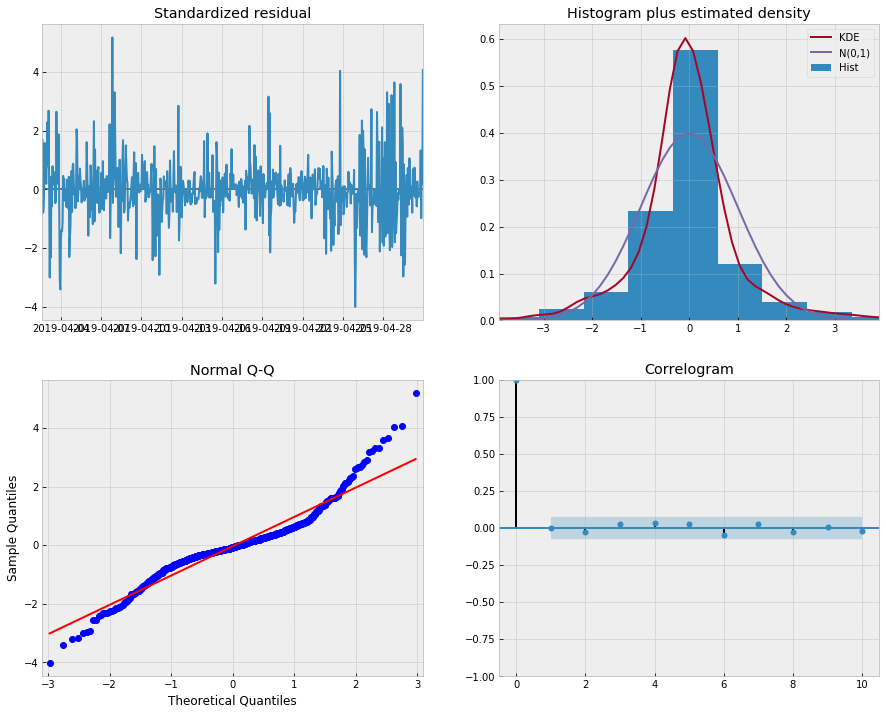

In [26]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=Min_AIC_list['param'],
                                seasonal_order=Min_AIC_list['param_seasonal'],
                                enforce_stationarity=False,
                                 enforce_invertibility=False)
results = mod.fit()

print("### Min_AIC_list ### \n{}".format(Min_AIC_list))

print(results.summary().tables[1])
dia = results.plot_diagnostics(figsize=(15, 12))

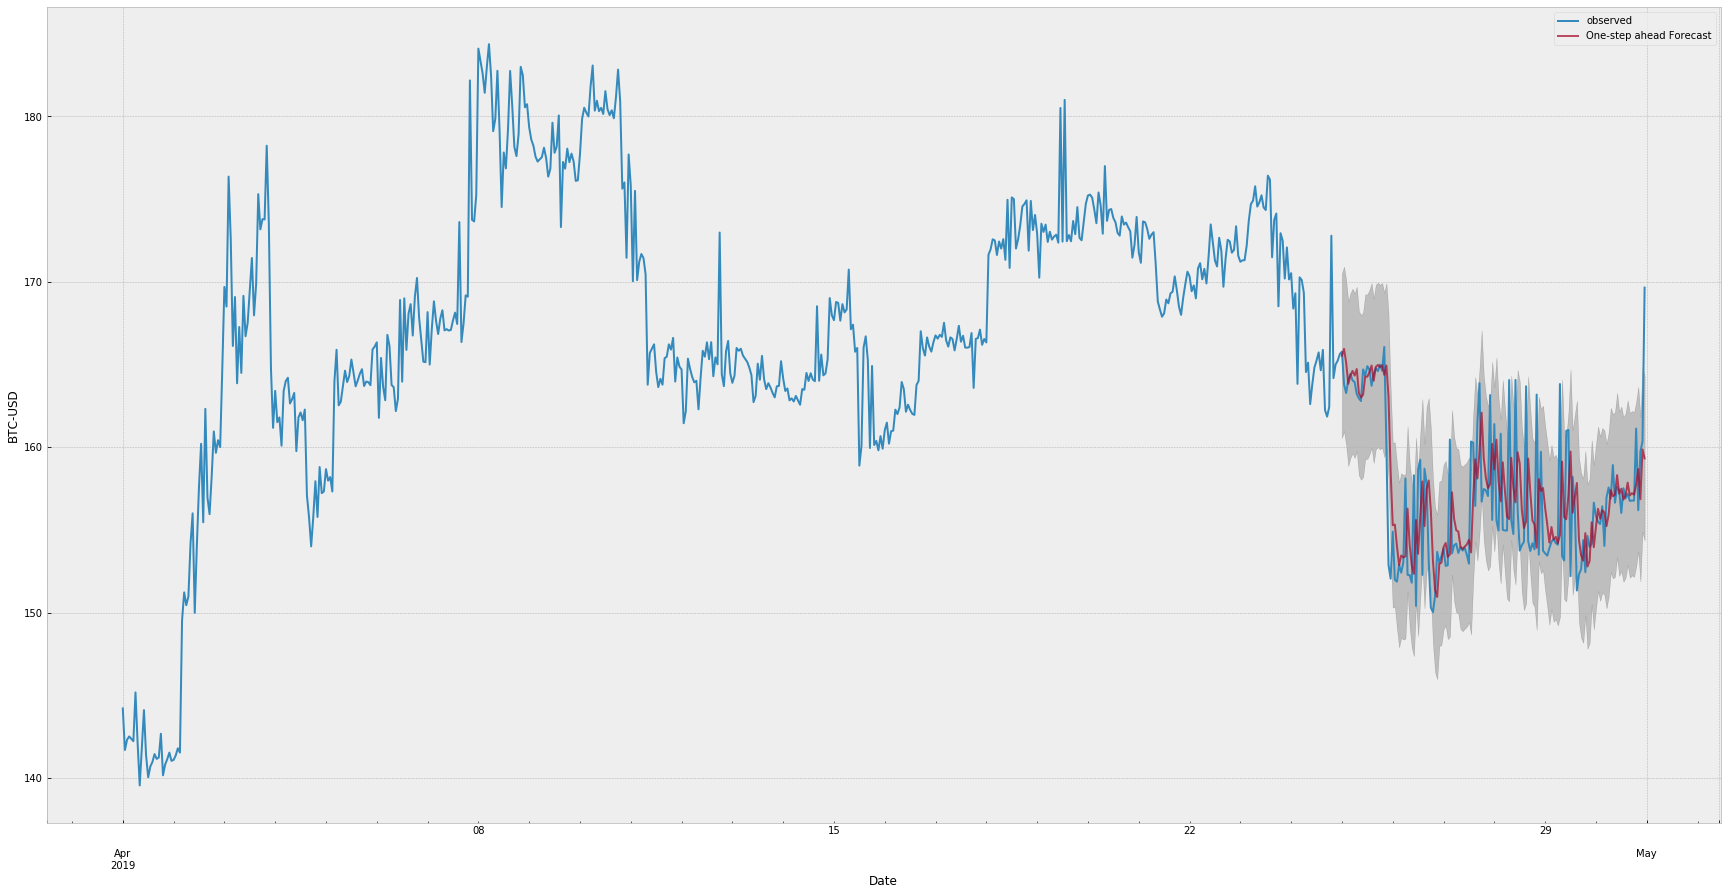

In [27]:
pred = results.get_prediction(start=y.index[int(len(y)*0.8)], end=y.index[-1], dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed', figsize=(30, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('BTC-USD')
plt.legend()

In [28]:
y_forecasted = pred.predicted_mean
y_truth = y[int(len(y)*0.8):]
y_train = y[:int(len(y)*0.8)]

# MSE
mse = ((y_truth - y_forecasted) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# OSR2
OSR2 = 1 - np.sum((y_truth - y_forecasted) ** 2)/np.sum((y_truth - np.average(y_train)) ** 2)
print('The out-of-sample R2 of our model is {}'.format(round(OSR2, 4)))

The Mean Squared Error of our forecasts is 11.677
The out-of-sample R2 of our model is 0.9071


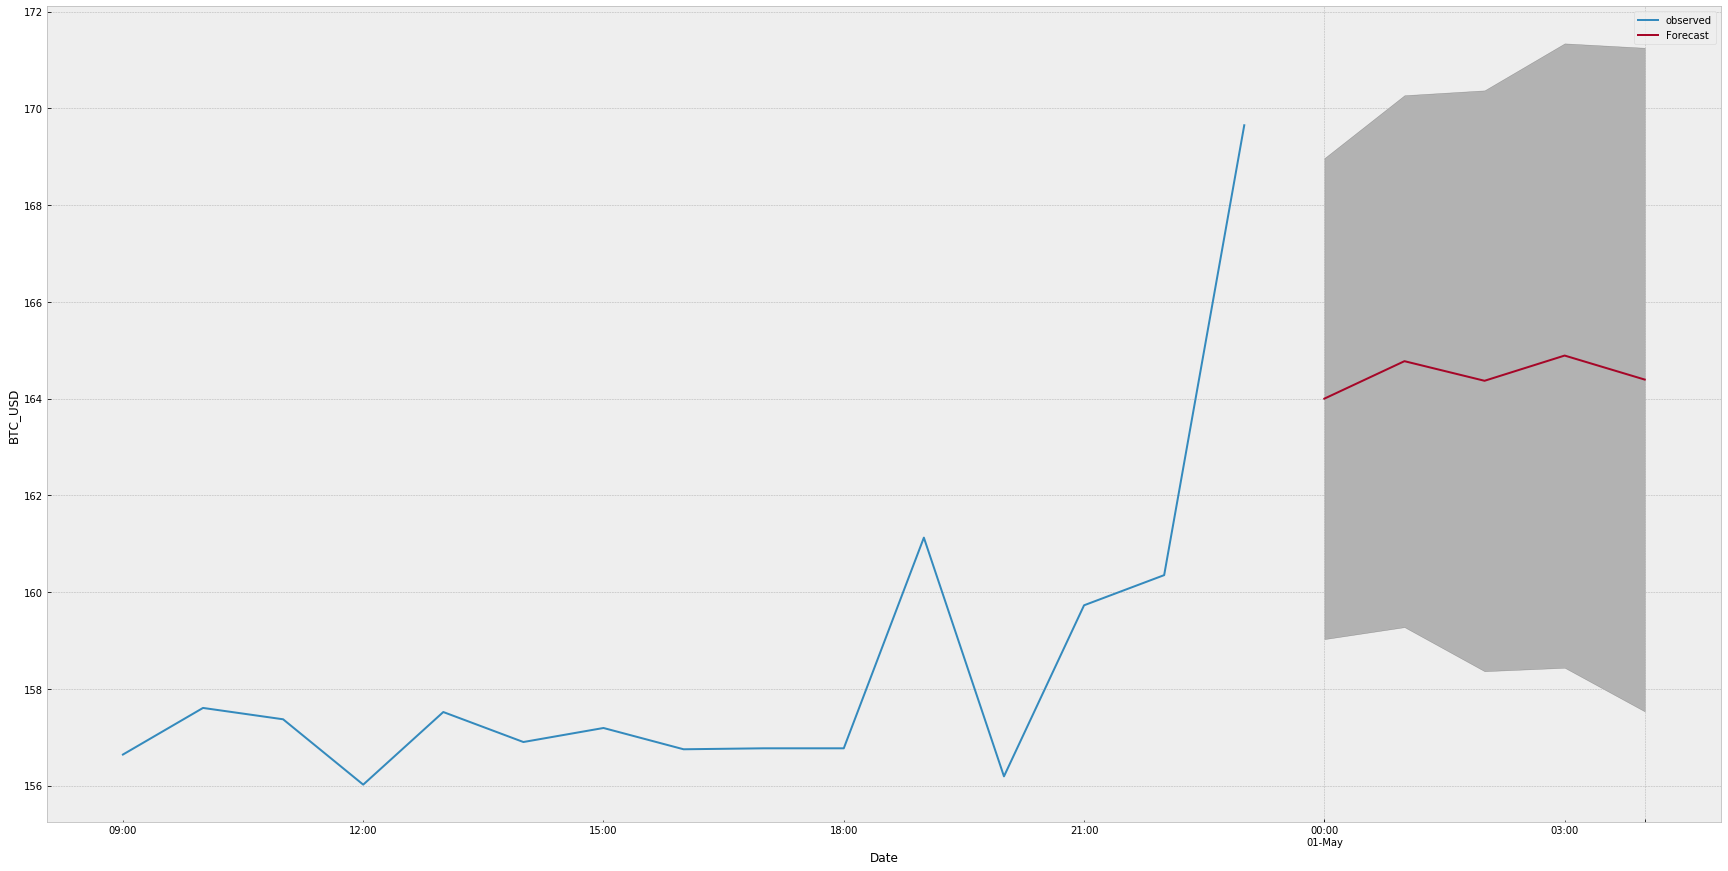

In [29]:
# Forcast the future
pred_uc = results.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()

ax = y[-15:].plot(label='observed', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('BTC_USD')

plt.legend()